---
## Forecasting <br> <font size=3.4> Dataset:CocaCola_Sales_Rawdata.xlsx<br><font size=2>Forecast the Coca cola sales data set.
---

In [2]:
# Import libraries
from pandas import read_csv
from matplotlib import pyplot
from numpy import sqrt
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
#series
series=pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
series

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


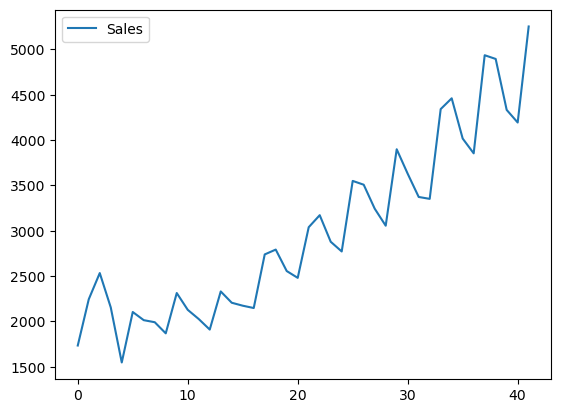

In [4]:
from pandas import read_csv
from matplotlib import pyplot
series.plot()
pyplot.show()

array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

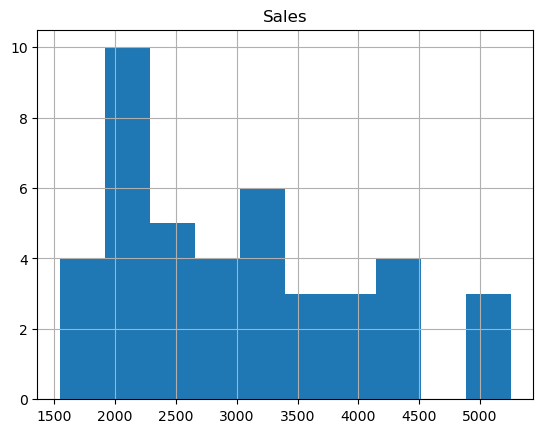

In [5]:
series.hist()

<AxesSubplot:ylabel='Density'>

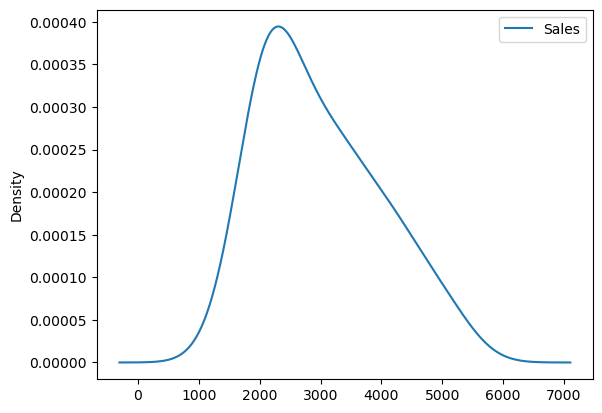

In [6]:
series.plot(kind='kde')

In [7]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = pd.read_excel('CocaCola_Sales_Rawdata.xlsx', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]


In [8]:
train

array([[1734.827],
       [2244.961],
       [2533.805],
       [2154.963],
       [1547.819],
       [2104.412],
       [2014.363],
       [1991.747],
       [1869.05 ],
       [2313.632],
       [2128.32 ],
       [2026.829],
       [1910.604],
       [2331.165],
       [2206.55 ],
       [2173.968],
       [2148.278],
       [2739.308],
       [2792.754],
       [2556.01 ],
       [2480.974]], dtype=float32)

In [9]:
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=2480.974, Expected=3039.523
>Predicted=3039.523, Expected=3172.116
>Predicted=3172.116, Expected=2879.001
>Predicted=2879.001, Expected=2772.000
>Predicted=2772.000, Expected=3550.000
>Predicted=3550.000, Expected=3508.000
>Predicted=3508.000, Expected=3243.860
>Predicted=3243.860, Expected=3056.000
>Predicted=3056.000, Expected=3899.000
>Predicted=3899.000, Expected=3629.000
>Predicted=3629.000, Expected=3373.000
>Predicted=3373.000, Expected=3352.000
>Predicted=3352.000, Expected=4342.000
>Predicted=4342.000, Expected=4461.000
>Predicted=4461.000, Expected=4017.000
>Predicted=4017.000, Expected=3854.000
>Predicted=3854.000, Expected=4936.000
>Predicted=4936.000, Expected=4895.000
>Predicted=4895.000, Expected=4333.000
>Predicted=4333.000, Expected=4194.000
>Predicted=4194.000, Expected=5253.000
RMSE: 527.148


In [10]:
import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [11]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [12]:
train = pd.read_excel('CocaCola_Sales_Rawdata.xlsx', header=0, index_col=0, parse_dates=True)
X = train.values
X = X.astype('float32')

In [28]:
# fit model
#from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(X, order=(3,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.predict(1, 79)

array([1705.11569573, 1995.62757999, 2054.43326525, 1881.70859983,
       1969.02167968, 2462.27104787, 1942.04497254, 1803.54503101,
       1985.54446838, 2204.86823829, 1951.89760747, 1997.52692024,
       2126.24763664, 2266.36603767, 2016.00112511, 2079.91241991,
       2242.94026497, 2496.57237095, 2352.67988386, 2348.02227769,
       2661.90201166, 2944.46094673, 2741.8551489 , 2655.59710322,
       2971.11952264, 3402.01068286, 3016.01737102, 3029.05032309,
       3354.81316181, 3765.28601696, 3235.13004612, 3288.37211888,
       3674.89224035, 4014.97804094, 3699.60991944, 3669.52097725,
       4194.85350523, 4757.67552229, 4209.35146011, 4112.81375963,
       4684.76893671, 5124.04146545, 4484.82705913, 4375.28237601,
       4949.77499651, 5063.00572375, 4646.64722836, 4487.38984325,
       4809.24536725, 4971.05242003, 4738.13622179, 4577.64423727,
       4744.44582762, 4892.77906706, 4778.8384993 , 4645.88710974,
       4720.17885788, 4835.51548663, 4790.83956452, 4693.16578